# 3D Printer DataSet for Mechanical Engineers

Import Data

In [1]:
import pandas as pd
data = pd.read_csv("data.csv", sep = ",")

In [2]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


Let's multiply these columns by 100 to make them more understandable.

In [3]:
data.layer_height = data.layer_height*100
data.elongation = data.elongation*100

In [4]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,2.0,8,90,grid,220,60,40,abs,0,25,18,120.0
1,2.0,7,90,honeycomb,225,65,40,abs,25,32,16,140.0
2,2.0,1,80,grid,230,70,40,abs,50,40,8,80.0
3,2.0,4,70,honeycomb,240,75,40,abs,75,68,10,50.0
4,2.0,6,90,grid,250,80,40,abs,100,92,5,70.0


In this data set, ABS and PLA assigned 0 and 1 values for materials.

In [5]:
data.material = [0 if each == "abs" else 1 for each in data.material]
# abs = 0, pla = 1

data.infill_pattern = [0 if each == "grid" else 1 for each in data.infill_pattern]
# grid = 0, honeycomb = 1

In [6]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


Seperate Input parameters and Prediction Materials.

In [7]:
y_data = data.material.values
x_data = data.drop(["material"],axis=1)

In [8]:
absm = data[data.material == 0]
pla = data[data.material == 1]

In [9]:
absm.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


In [10]:
import matplotlib.pyplot as plt

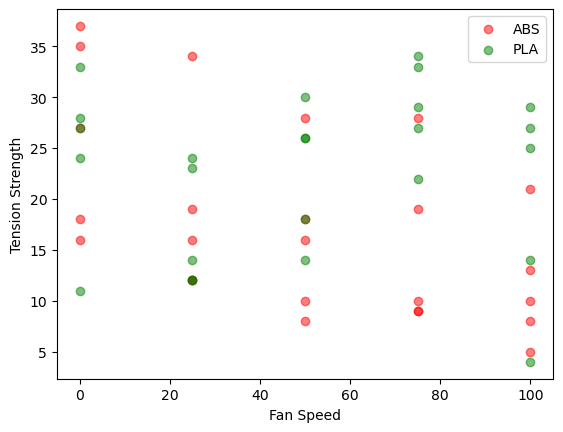

In [11]:
plt.scatter(absm.fan_speed,absm.tension_strenght,color="red",label="ABS",alpha= 0.5)
plt.scatter(pla.fan_speed,pla.tension_strenght,color="green",label="PLA",alpha= 0.5)
plt.xlabel("Fan Speed")
plt.ylabel("Tension Strength")
plt.legend()
plt.show()

As you see, the air circulation not good for ABS

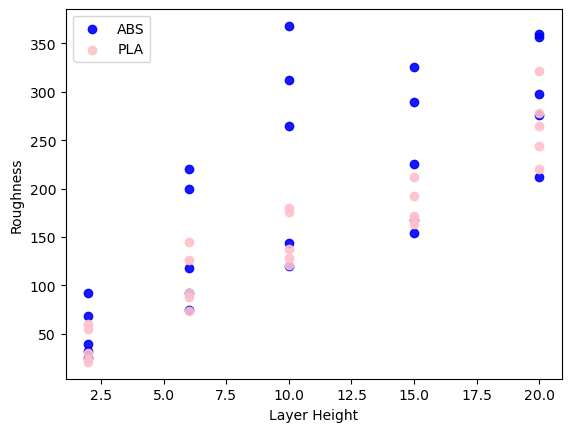

In [12]:
plt.scatter(absm.layer_height,absm.roughness,color="blue",label="ABS",alpha= 0.9)
plt.scatter(pla.layer_height,pla.roughness,color="pink",label="PLA",alpha= 0.9)
plt.xlabel("Layer Height")
plt.ylabel("Roughness")
plt.legend()
plt.show()

You can see as the layer height increases, the tensile strength increases. But PLA smoother than ABS

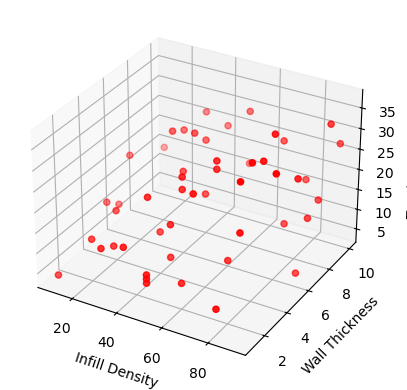

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = data.infill_density
y = data.wall_thickness
z = data.tension_strenght

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Infill Density')
ax.set_ylabel('Wall Thickness')
ax.set_zlabel('Tension Strength')

plt.show()

 3 nn score: 0.6666666666666666 
 1 nn score: 0.6666666666666666 
 2 nn score: 0.6666666666666666 
 3 nn score: 0.6666666666666666 
 4 nn score: 0.6666666666666666 
 5 nn score: 0.7333333333333333 
 6 nn score: 0.7333333333333333 
 7 nn score: 0.6666666666666666 
 8 nn score: 0.7333333333333333 
 9 nn score: 0.6666666666666666 
 10 nn score: 0.6 
 11 nn score: 0.4666666666666667 
 12 nn score: 0.6 
 13 nn score: 0.5333333333333333 
 14 nn score: 0.6 


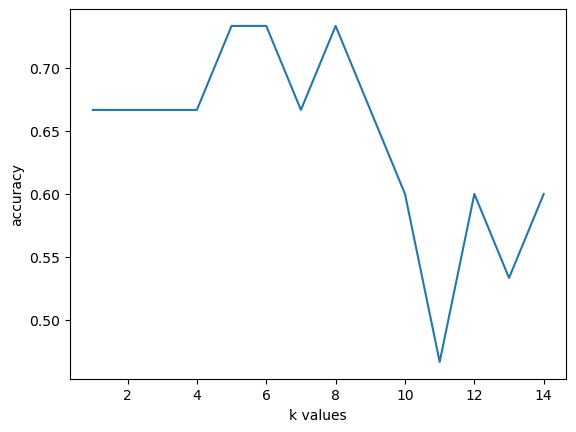

In [14]:
import numpy as np 
# normalization 
x_norm = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm,y_data,test_size = 0.3,random_state=1)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    print(" {} nn score: {} ".format(each,knn2.score(x_test,y_test)))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Input, Dense, Flatten
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
import numpy as np 

model = Sequential()
model.add(Dense(32,input_dim=11))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(16))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_data,y, epochs=500, batch_size =32, validation_split= 0.20)

ModuleNotFoundError: No module named 'keras.layers.normalization'

In [ ]:
a1 = 4 #layer_height*100
a2 = 5 #wall_thickness
a3 = 60 #infill_density
a4 = 0 #infilkk_pattern
a5 = 232 #nozzle_temperature 
a6 = 74 #bed_temperature
a7 = 90 #print_speed
a8 = 100 #fan_speed
a9 = 150 #roughness
a10 = 30 #tension_strenght
a11 = 200 #elangation*100

tahmin = np.array([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11]).reshape(1,11)
print(model.predict_classes(tahmin))

if model.predict_classes(tahmin) == 0: 
    print("Material is ABS")
else:   
    print("Material is PLA.")

### Previous portions were included with the zip file. All code chunks below are created by me. 

##### What is missing in the analysis? There is a lack of explanation of data in context, no checks for dirty data, EDA, and further regression analysis

##### Data in Context: 

Summary: This dataset comes from research by TR/Selcuk University Mechanical Engineering department. The aim is to determine how the adjustment parameters in 3D printers affect print quality, accuracy, and strength.

Input Variables:

1. Layer Height (mm): Thickness of each deposited layer. 

2. Wall Thickness (mm): Total thickness of the outer shell of the part. 

3. Infill Density (%): Percentage describing how solid the part’s interior is. 

4. Infill Pattern (categorical): Geometric layout of internal lattice structures (e.g., grid, honeycomb, gyroid).

5. Nozzle Temperature (°C): Extrusion temperature used to melt and deposit filament. 

6. Bed Temperature (°C): Temperature of the heated print bed, affecting part adhesion and warping behavior during printing.

7. Print Speed (mm/s): Velocity of the print head

8. Material (categorical): Type of filament used (e.g., PLA, ABS, PETG). Mechanical properties strongly depend on material choice.

9. Fan Speed (%): Cooling airflow applied to the extruded filament.

Output Variables: 

1. Roughness (µm): A quantitative measure of surface quality. Lower values indicate smoother surfaces. 

2. Tensile (Ultimate) Strength (MPa): Maximum stress a sample can withstand before breaking. Indicates mechanical integrity and load-bearing capacity. Influenced by temperature, material, infill density, and wall thickness.

3. Elongation (%): Percentage increase in length before fracture. Measures ductility and flexibility. Sensitive to material properties and interlayer bonding.


In [ ]:
# Checks for "dirty" data

## Missing Data + Outliers 

import numpy as npc
numeric_cols = data.select_dtypes(include=[np.number]).columns

for col in numeric_cols: 
    Missing = data[col].isnull().sum()
    print(f"{col} missing Values:\n{Missing}")


outliers_dict = {}

for col in numeric_cols:
    col_data = data[col].dropna()
    
    Q1 = np.percentile(col_data, 25)
    Q3 = np.percentile(col_data, 75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower) | (data[col] > upper)][col]
    outliers_dict[col] = outliers


print(outliers_dict)


plt.boxplot(data[numeric_cols].dropna())

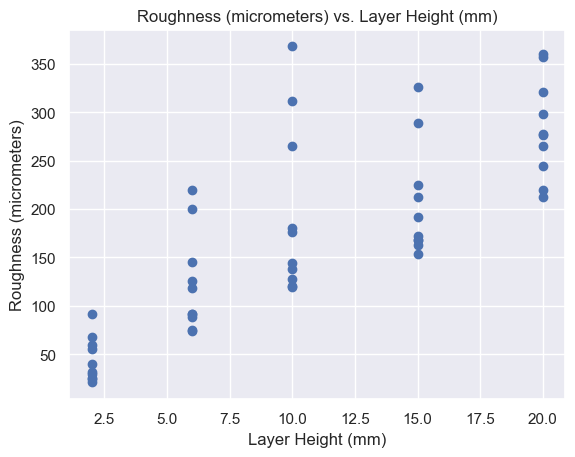

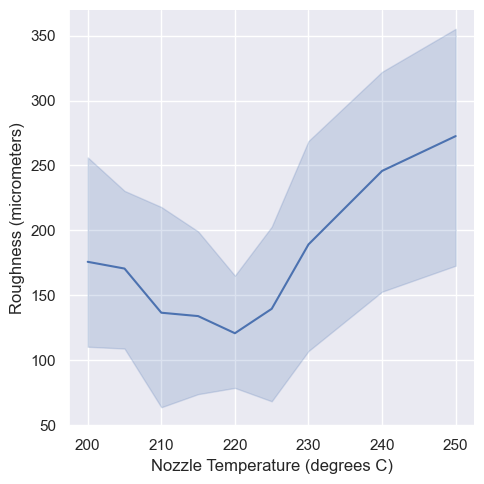

In [32]:
# EDA 

import seaborn as sns 
sns.set_theme(style="darkgrid")

# OUTCOME: Roughness 

## Layer Height 

plt.scatter(data.layer_height, data.roughness) 
plt.title("Roughness (micrometers) vs. Layer Height (mm)") 
plt.xlabel("Layer Height (mm)") 
plt.ylabel("Roughness (micrometers)") 
plt.show()

## Nozzle Temperature 

# min_idx = data['nozzle_temperature'].idxmin()        
# min_x = data.loc[min_idx, 'sx']      
# min_y = data.loc[min_idx, 'y']      

ax = sns.relplot(data=data, x="nozzle_temperature", y="roughness", kind="line")
plt.xlabel("Nozzle Temperature (degrees C)") 
plt.ylabel("Roughness (micrometers)")

# plt.scatter(min_x, min_y, color='red')  # optional: mark the point
# plt.annotate(f'Min: {min_y}', 
             # xy=(min_x, min_y), 
            #  xytext=(min_x+0.5, min_y+0.5),  # offset for text
            #  arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()



##### The optimal nozzle temperature is 220 degrees Celsius based on the plot. This would provide the optimal roughness being the most smooth surface. The graph shows that the surface gets smoother with increasing nozzle temperature up until 220 degrees Celsius from which it will then increase in roughness from there making the point an absolute minimum. For the roughness vs. layer height plot, we see that as the layer height increases the roughness also increases. If a layer is more thick, we see a more rough surface.


In [16]:
data.head()
data.rename(columns={"tension_strenght":"tensile_strength"}, inplace = True)
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


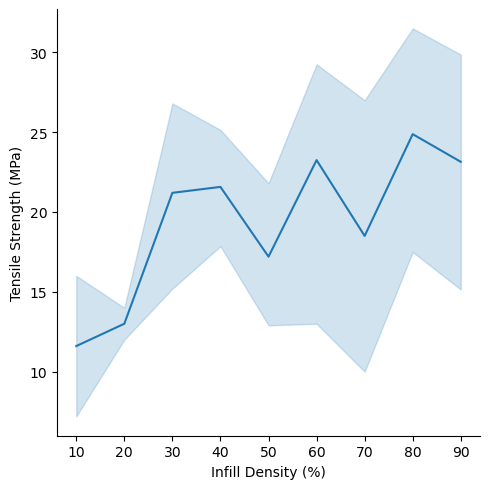

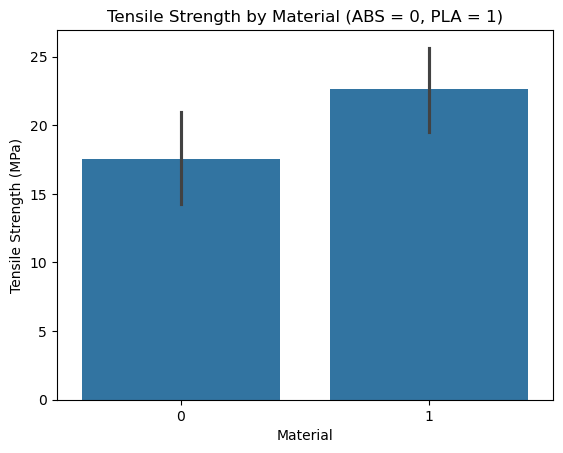

In [31]:
# OUTCOME: Tensile Strength 

## Infill Density 

import seaborn as sns
ax = sns.relplot(data= data, x = "infill_density", y = "tensile_strength", kind = "line")

plt.xlabel("Infill Density (%)")
plt.ylabel("Tensile Strength (MPa)")
plt.show()
## Material 

ax1 = sns.barplot(data = data, x = "material", y = "tensile_strength")
plt.title("Tensile Strength by Material (ABS = 0, PLA = 1)")
plt.xlabel("Material") 
plt.ylabel("Tensile Strength (MPa)")
plt.show()

##### We see that as the infill density increases, the tensile strength increases as well. This makes sense as the interior of material becomes more solid, the overall load that can be endured is higher which implies more tensile strength. The material plot shows that PLA has a higher maximum tensile stength than ABS. This would mean that ABS is more flexible while PLA is more rigid and resistent. 

### After exploring the data, we can now come up with some idea of what good model predictors would be. The next steps are train-test-split/cross validation, feature selection, and model prediction.

In [33]:
# Cross Validation 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error





